# Sử dụng k-nearest neighbors để xác định trạng thái mưa/không mưa dựa trên dữ liệu quan trắc
## Data
* [Truy cập dữ liệu thông qua API](http://achipvn.com/hocphp/thi/AI/data_web/data4_web.php?tram=quan9&tg=2020-11-01&sl=100&fbclid=IwAR2qYPS3qZq-YNElcKhZrRz54qOdbWxKWV9nQgJeHlU0xOFmoe6o-vBKX1Q)
* Trong data gồm các yếu tố: Nhiệt độ, Độ ẩm, Gió, Bức xạ

## Khái niệm KNN
Là thuật toán đơn giản để triển khai Supervised machine learning algorithm, được sử dụng để giải quyết các bài toán phân loại(classification) và hồi quy (regression).
Nhận vào một tập features (X) và tìm ra output (Y) phù hợp (label), dựa trên tập dữ liệu samples.

## [scikit-learn](https://scikit-learn.org/stable/)
* Bộ thư việc về machine learning
* Open source
* Hỗ trợ các models supervised and unsupervised learning.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

## Đọc dữ liệu từ csv file

In [2]:
csvData = "data-1"

In [3]:
df = pd.read_csv(csvData, sep=',', names=['times','nhiet','am','gio','bucxa','mua'], skiprows=1)

## Xóa cột times trong data frames, hiện tại chưa sử dụng thông tin từ cột này

In [4]:
del df['times']
df.head()

,nhiet,am,gio,bucxa,mua
0,27.5,86.0,1.1,30.012,0
1,27.5,86.0,0.4,30.015,0
2,27.5,86.0,0.7,30.018,0
3,27.5,86.0,0.9,30.018,0
4,27.7,86.0,0.7,30.012,0


## Chuyển đổi các giá trị kiểu string sang kiểu số

In [5]:
df.astype({'nhiet':np.float, 'am':np.float, 'gio':np.float, 'bucxa':np.float, 'mua':np.short})

,nhiet,am,gio,bucxa,mua
0,27.5,86.0,1.1,30.012,0
1,27.5,86.0,0.4,30.015,0
2,27.5,86.0,0.7,30.018,0
3,27.5,86.0,0.9,30.018,0
4,27.7,86.0,0.7,30.012,0
...,...,...,...,...,...
31120,35.4,56.0,1.1,29.926,0
31121,34.8,58.0,0.7,29.929,0
31122,35.6,56.0,1.3,29.926,0
31123,34.4,59.0,0.4,29.929,0


In [6]:
print('max nhiet: ',df['nhiet'].max())
print('min nhiet: ',df['nhiet'].min())

max nhiet:  39.0
min nhiet:  22.8


## Xóa các dòng dữ liệu giống nhau trong data frame

In [7]:
dfNotDuplicate = df.drop_duplicates()
dfNotDuplicate.head()

,nhiet,am,gio,bucxa,mua
0,27.5,86.0,1.1,30.012,0
1,27.5,86.0,0.4,30.015,0
2,27.5,86.0,0.7,30.018,0
3,27.5,86.0,0.9,30.018,0
4,27.7,86.0,0.7,30.012,0


## Import các bộ thư việc matplotlib và sklearn

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Tạo ra các tập dữ liệu features(X) và result (Y)

In [9]:
X = dfNotDuplicate[['nhiet','am','gio','bucxa']]
Y = dfNotDuplicate['mua']

## Sử dụng hàm train_test_split của bộ thư viện sklearn để chia các tập dữ liệu X và Y thành các tập dữ liệu để trai và test

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [11]:
print('y_train mua: ', len(y_train[y_train == 1]))
print('y_test mua: ', len(y_test[y_test == 1]))

y_train mua:  117
y_test mua:  28


## Import model KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

## Training với tập dữ liệu train

In [14]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Hàm để xem accuracy (độ chính xác) của model ứng với số k =5

In [15]:
knn.score(x_train, y_train)

0.9947419399474194

In [16]:
knn.score(x_test, y_test)

0.9957111234089652

## Sử dụng model mới train để dự báo

In [17]:
knn.predict([[24.5,83.0,0.70,29.950]])

array([0])

## Phân tích và đánh giá model với các số k khác nhau

In [18]:
training_accuracy = []
test_accuracy = []
k_range = range(1,31)    

In [19]:
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

## Hiển thị biểu đồ, trực qua hóa kết quả training với các số k khác nhau

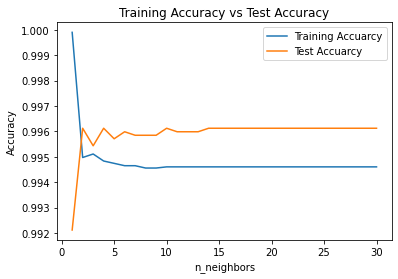

In [20]:
plt.figure()
plt.plot(k_range, training_accuracy, label='Training Accuarcy')
plt.plot(k_range, test_accuracy, label='Test Accuarcy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.savefig('Training_Accuarcy.png')
plt.show()

Kết luận:
* với k = 1 thì accuracy của training và test lệch nhau
* với k từ 2 đến 4 thì accuracy của training và test gần bằng nhau. Số k phù hợp với model và data
* với k > 4 thì lệch nhau và ổn định